In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Agregando csv y librerías necesarias
data = pd.read_csv('personality_dataset.csv',sep = ',',decimal='.')
df = pd.DataFrame(data)

df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [15]:
#Cambio Yes y No por 1 y 0 para que entren en el análisis
df.replace({"Yes": 1, "No": 0}, inplace=True)

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,Extrovert
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,Introvert
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,Introvert
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,Extrovert
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,Extrovert


In [17]:
df_stats=df.describe().T
print("Estadísticas descriptivas:")
df_stats

Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2837.0,4.505816,3.479192,0.0,2.0,4.0,8.0,11.0
Stage_fear,2827.0,0.498762,0.500087,0.0,0.0,0.0,1.0,1.0
Social_event_attendance,2838.0,3.963354,2.903827,0.0,2.0,3.0,6.0,10.0
Going_outside,2834.0,3.000000,2.247327,0.0,1.0,3.0,5.0,7.0
Drained_after_socializing,2848.0,0.494031,0.500052,0.0,0.0,0.0,1.0,1.0
Friends_circle_size,2823.0,6.268863,4.289693,0.0,3.0,5.0,10.0,15.0
Post_frequency,2835.0,3.564727,2.926582,0.0,1.0,3.0,6.0,10.0


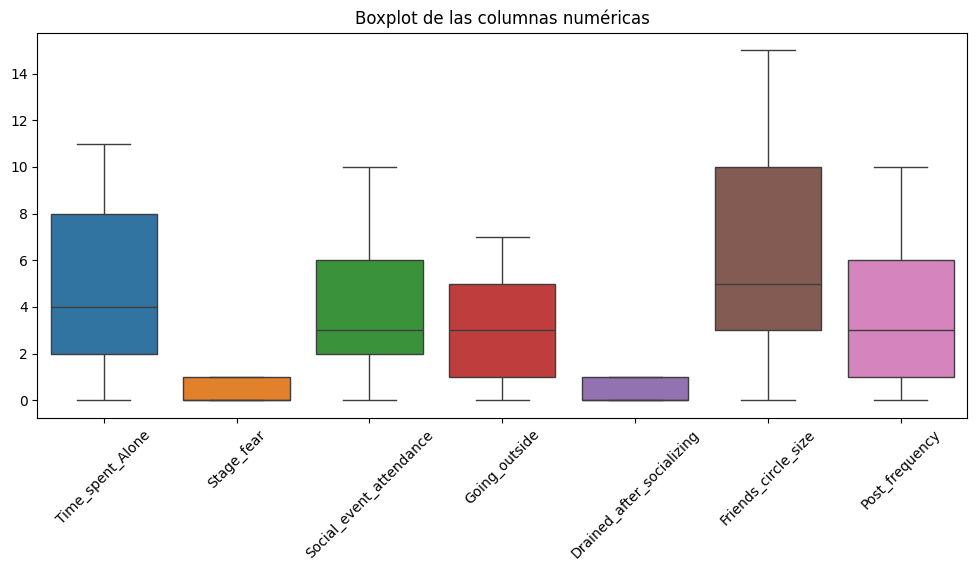

Número de Filas con Valores Atípicos: 0


In [28]:
import seaborn as sns

# Seleccionamos sólo las columnas numéricas
df_numerico = df.select_dtypes(include=["number"])


# Se crea el boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_numerico)
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas columnas
plt.title("Boxplot de las columnas numéricas")
plt.show()

# Buscamos valores atípicos en cada columna numérica

Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartílico

# Definimos los límites de valores normales
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos los valores atípicos
outliers = ((df_numerico < lower_bound) | (df_numerico > upper_bound)).any(axis=1)
cant_outliers = outliers.sum()

print("Número de Filas con Valores Atípicos:", cant_outliers)

In [29]:
#Correlación de los datos no normalizados
correlaciones = df_numerico.corr(method='pearson')
correlaciones

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,0.859387,-0.733011,-0.750760,0.860167,-0.717185,-0.732649
Stage_fear,0.859387,1.000000,-0.860010,-0.882223,1.000000,-0.835318,-0.854477
Social_event_attendance,-0.733011,-0.860010,1.000000,0.747756,-0.859627,0.734795,0.744615
Going_outside,-0.750760,-0.882223,0.747756,1.000000,-0.882207,0.736390,0.770819
Drained_after_socializing,0.860167,1.000000,-0.859627,-0.882207,1.000000,-0.834689,-0.852247
Friends_circle_size,-0.717185,-0.835318,0.734795,0.736390,-0.834689,1.000000,0.707888
Post_frequency,-0.732649,-0.854477,0.744615,0.770819,-0.852247,0.707888,1.000000
